# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [40]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Converting the file to a DataFrame 
mouse_metadata_df=pd.DataFrame(mouse_metadata)
study_results_df=pd.DataFrame(study_results)


# Combine the data into a single dataset
combine_df=pd.merge(study_results_df,mouse_metadata_df,on="Mouse ID")



# Display the data table for preview
combine_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [41]:
# Checking the number of mice.
number_of_mice=len(combine_df['Mouse ID'].value_counts())
number_of_mice

249

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse=combine_df.loc[combine_df.duplicated(subset=["Mouse ID","Timepoint"]),'Mouse ID'].unique()

print(f'this is the duplicated mouse Id:{duplicated_mouse}')


this is the duplicated mouse Id:['g989']


In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_for_duplicated_id=pd.DataFrame(duplicated_mouse)
all_data_for_duplicated_id

,0
0,g989


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#by using the isin we call the duplicated item and set it as false to not be counted in the same DF
clean_df=combine_df[combine_df['Mouse ID'].isin(duplicated_mouse)==False]

clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [45]:
# Checking the number of mice in the clean DataFrame.
len_clean_mouse=len(clean_df['Mouse ID'].value_counts())
len_clean_mouse

248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# this the Direct way of group by Regimen and then get standard deviation that we want by specifying the culomn that we want to get the 
# SD for it .

# Mean of Tumor Volume 
mean_TumVol =clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

#Median Of
median_TumVol = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
# Variance
variance_TumVol = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
#Stantdard Deviation
std_TumVol = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
# SEM
SEM_TumVol = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_static_df=pd. DataFrame({"Mean Tumor Volume":mean_TumVol,
                          "Median Tumor Volume":median_TumVol,
                          "Variance Tumor Volume":variance_TumVol,
                          "Standart Deviation Tumor Volume":std_TumVol,
                          "SEM Tumor Volume":SEM_TumVol })
summary_static_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standart Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

agg_groupby=clean_df.groupby('Drug Regimen')

summary_statis_2_df=agg_groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_statis_2_df

# Using the aggregation method, produce the same summary statistics in a single line.


C:\Users\zadas\AppData\Local\Temp\ipykernel_1880\4069681181.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_statis_2_df=agg_groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

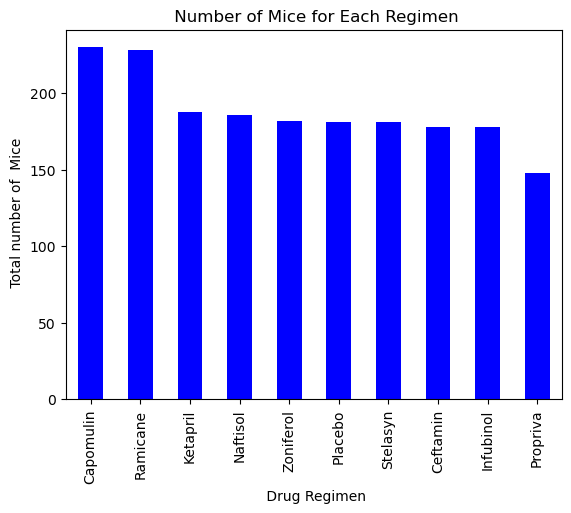

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# used the clean_df to ommit the duplictaed Row Mice_count=248
count_mouse_regimen=clean_df.groupby('Drug Regimen').count()['Mouse ID']


sorted_count =count_mouse_regimen.sort_values(ascending=False)


sorted_count.plot(kind='bar',color='b' ,
                          title=" Number of Mice for Each Regimen",
                          xlabel=" Drug Regimen",
                          ylabel=" Total number of  Mice")
plt.savefig("Image/bar1_panads.png" , bbox_inches= "tight")

sorted_count

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Create a list for the Mouse Id in the integer format to be able to count the,
Mouse_id_count_list=( clean_df.groupby( ['Drug Regimen'] )['Mouse ID'].count() ).tolist()
Mouse_id_count_list.sort(reverse=True)

print(Mouse_id_count_list)
print(sorted_mouse_id)

[230, 228, 188, 186, 182, 181, 181, 178, 178, 148]


NameError: name 'sorted_mouse_id' is not defined

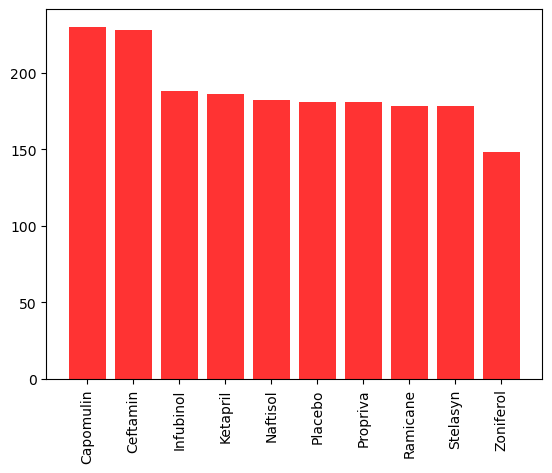

In [62]:
x_axis=np.arange(len(count_mouse_regimen))
plt.bar(x_axis,Mouse_id_count_list, color="r",alpha=0.8,align='center')

tick_loc=[ value for value in x_axis]
plt.xticks(tick_loc,['Capomulin', 'Ceftamin',
                    'Infubinol', 'Ketapril', 
                    'Naftisol', 'Placebo', 'Propriva',
                    'Ramicane', 'Stelasyn',
                    'Zoniferol'],rotation='vertical')



plt.savefig("Image/bar2_panads.png" , bbox_inches= "tight")

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#useing group by to select mouse id and sex
groupby_gender = clean_df.groupby(['Mouse ID','Sex'])

#Create DF with size od the Mouse Id and SEX
gender_df= pd.DataFrame(groupby_gender.size())
gender_df.head()
#created anothDf to count the number of each sex by selecting the Sex
mouse_gender= pd.DataFrame(gender_df.groupby(['Sex']).count())
#create a new Column as Total count that would be used in Pie chart to set as total number of gender
mouse_gender.columns=["Total count"]

mouse_gender
#created another column to get the percentage of female and male which will be the DF.pie for the next part 
mouse_gender["Gender percentage"]=(100*(mouse_gender["Total count"]/mouse_gender["Total count"].sum()))

#mouse_gender["Gender percentage"]=mouse_gender["Gender percentage"]


mouse_gender["Gender percentage"].round(decimals=2)

Sex
Female    49.6
Male      50.4
Name: Gender percentage, dtype: float64

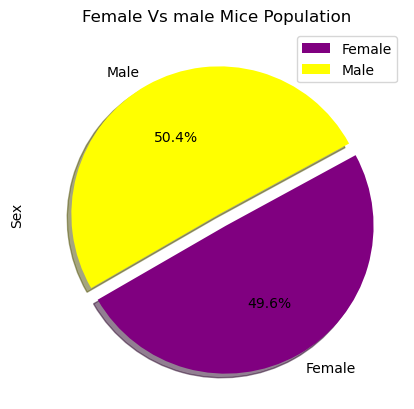

In [52]:
#Creating  a pie chart using pandas
colors= ['purple','yellow']
explode=(0.09,0)
plot=mouse_gender.plot(kind='pie',y='Total count',colors=colors,startangle= 210, explode=explode,
                      shadow=True,autopct="%1.1f%%" ,
                      title="Female Vs male Mice Population ",
                      xlabel="Female",
                      ylabel='Sex' ,
                      
                      )
plt.savefig("Image/pie_panads.png" , bbox_inches= "tight")
plt.show()


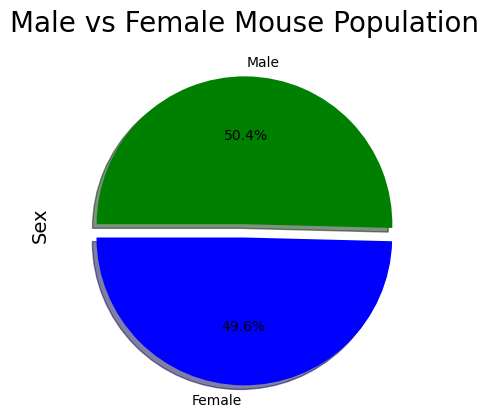

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#setting the Labels,colors,explode,sizes
labels=["Female","Male"]
sizes=[49.596774,50.403226]
colors= ['blue','green']
explode=(0.09,0)

#creating the pie
plt.pie(sizes, explode= explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=180)

#chaning the titles and labels
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
#Set equal axis


plt.savefig("Image/pie2_plot.png", bbox_inches = "tight")
plt.show()



## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df= clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df =clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df=clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_df=clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse on Capomulin Reginmen
Capomulin_last=Capomulin_df.groupby('Mouse ID').max()['Timepoint']

Capomulin_vol=pd.DataFrame(Capomulin_last)




# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, combine_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [16]:
# Becuase we need to do this for each Regimen Dta Frame , here will do one by one then will create a list to make the loop 
#Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [17]:
# Ramicane Reginmen

# Start by getting the last (greatest) timepoint for each mouse on Capomulin Reginmen
Ramicane_last=Ramicane_df.groupby('Mouse ID').max()['Timepoint']

Ramicane_vol=pd.DataFrame(Ramicane_last)




# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_merge = pd.merge(Ramicane_vol, combine_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [18]:
# Becuase we need to do this for each Regimen Dta Frame , here will do one by one then will create a list to make the loop 
#Ramicanequartiles and IQR
# Determine outliers using upper and lower bounds
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles = Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [19]:
######Infubinol
# Start by getting the last (greatest) timepoint for each mouse on Capomulin Reginmen
Infubinol_last=Infubinol_df.groupby('Mouse ID').max()['Timepoint']

Infubinol_vol=pd.DataFrame(Infubinol_last)




# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Infubinol_merge = pd.merge(Infubinol_vol, combine_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [20]:
# Becuase we need to do this for each Regimen Dta Frame , here will do one by one then will create a list to make the loop 
#Infubinol    quartiles and IQR
# Determine outliers using upper and lower bounds
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
#######Ceftamin
# Start by getting the last (greatest) timepoint for each mouse on Capomulin Reginmen
Ceftamin_last=Ceftamin_df.groupby('Mouse ID').max()['Timepoint']

Ceftamin_vol=pd.DataFrame(Ceftamin_last)




# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ceftamin_merge = pd.merge(Ceftamin_vol, combine_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [22]:
# Becuase we need to do this for each Regimen Dta Frame , here will do one by one then will create a list to make the loop 
#Ceftamin   quartiles and IQR
# Determine outliers using upper and lower bounds
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


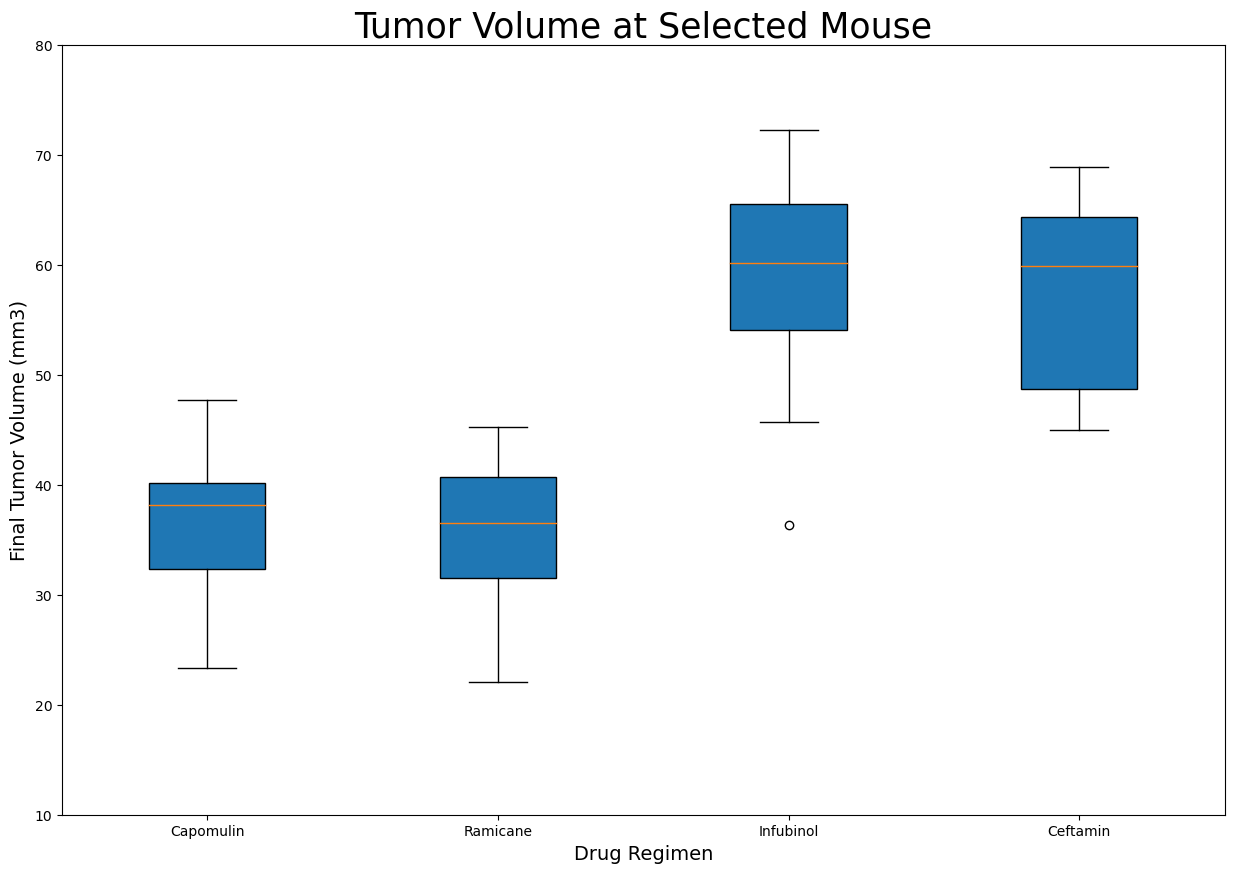

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("Image/box_plot.png", bbox_inches = "tight")

plt.show()

In [24]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21


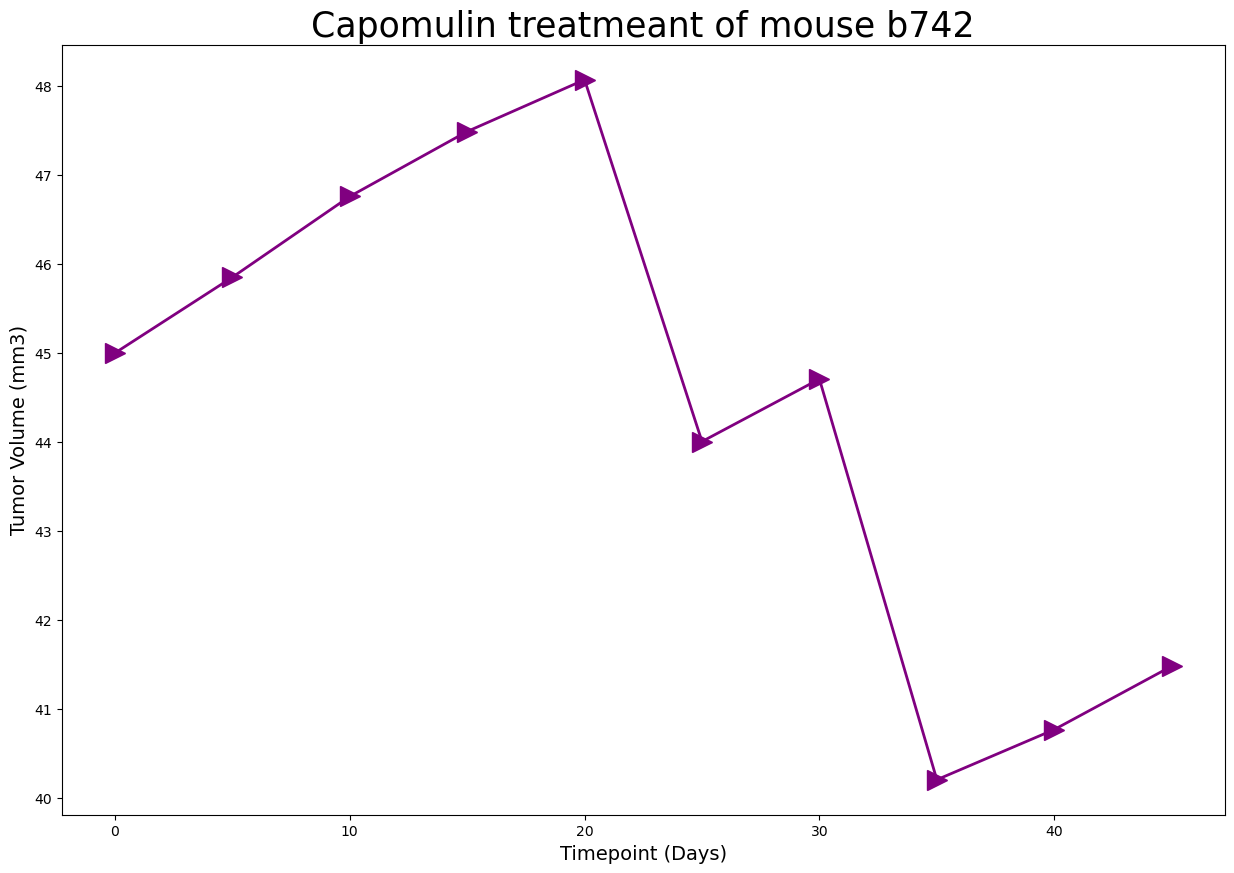

In [26]:
#ceating a line Plot 
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b742',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker=">",color="purple", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


plt.savefig("Image/line_graph.png", bbox_inches = "tight")
plt.show()

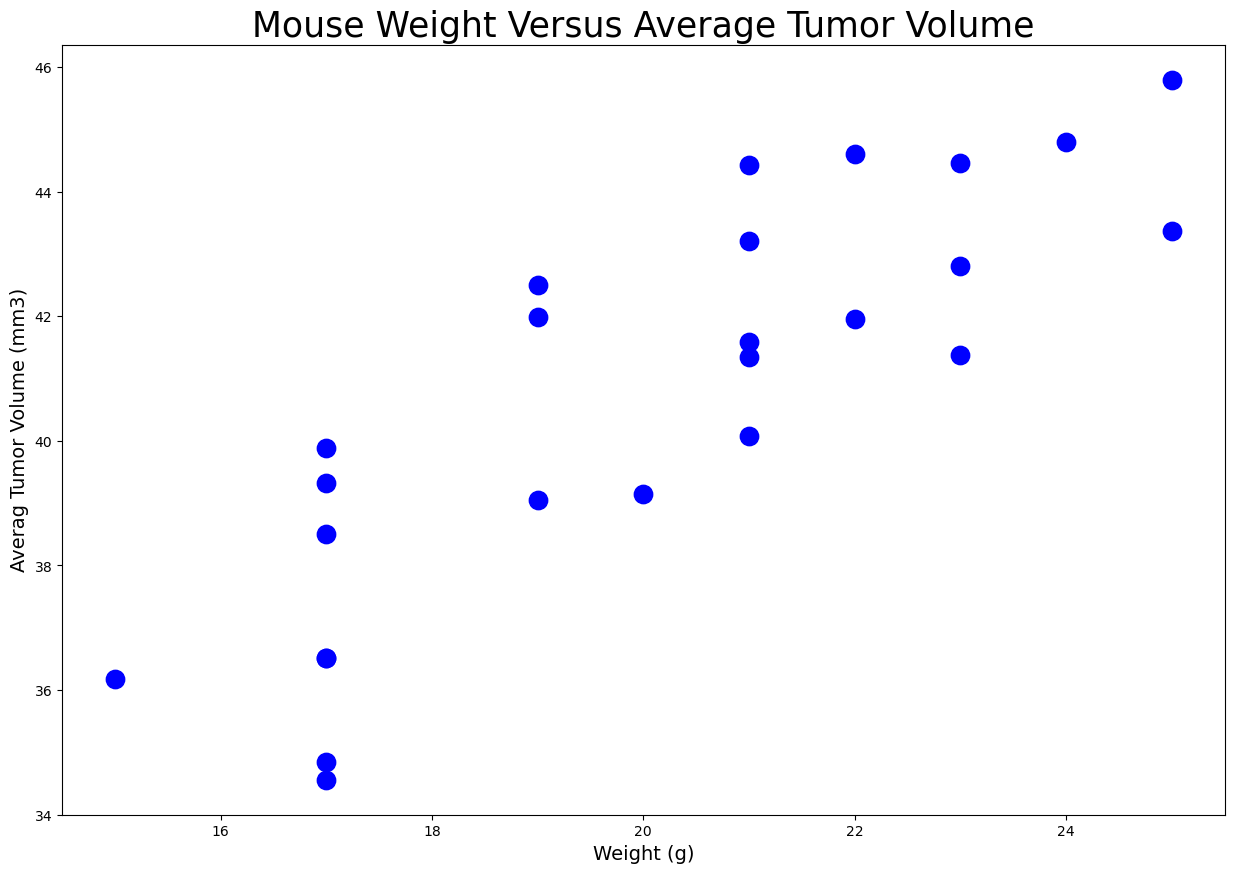

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


plt.savefig("Image/scatterplot.png", bbox_inches = "tight")
plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [29]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']



(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)  
regress_values = x_values * slope + intercept
   

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241049
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
pandas (Correlation coefficient):0.84
stderr:0.12754359033201323
y = 0.95x + 21.55


NameError: name 'x_value' is not defined

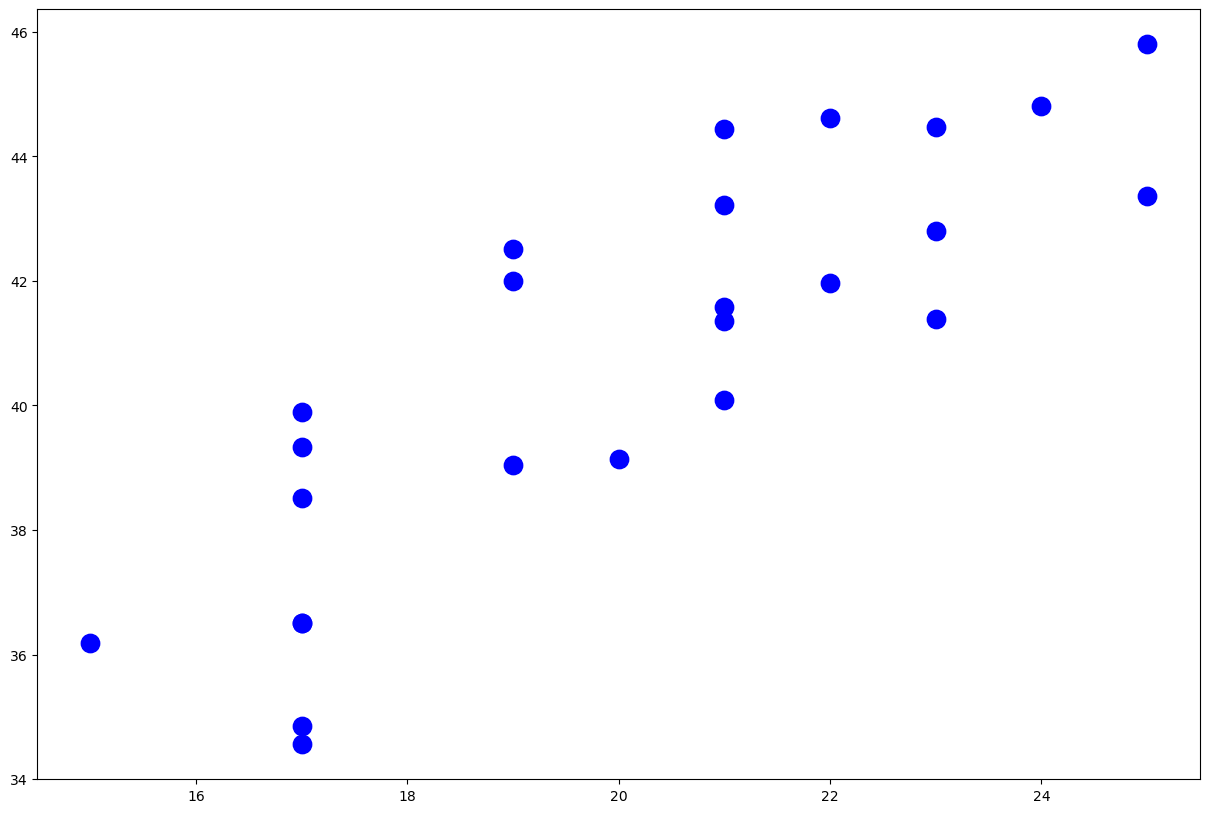

In [30]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_value,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("Image/linear_regression.png", bbox_inches = "tight")
plt.show()